<a href="https://colab.research.google.com/github/Sangyeup/BHI_Study/blob/main/PCA_tSNE_%EC%97%AC%EC%A7%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

     |████████████████████████████████| 462 kB 5.1 MB/s 


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline

In [59]:
# data preparation

cancer = load_breast_cancer()
data = cancer['data']
target = cancer['target']
print(data.shape)
print(target.shape)
print(data)
print(target)

scaler = StandardScaler()
data = scaler.fit_transform(data)
print(data)

(569, 30)
(569,)
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0

In [58]:
# PCA

pca = PCA(n_components=2)
pca.fit(data)
transformed_data = pca.fit_transform(data)
# print(transformed_data)
tf_dataframe = pd.DataFrame(data = transformed_data, columns = ['PC1', 'PC2'])
target_df = pd.DataFrame(data = target, columns = ['target'])

cancer_data = pd.concat([tf_dataframe, target_df], axis=1)
cancer_data

,PC1,PC2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0
...,...,...,...
564,6.439315,-3.576817,0
565,3.793382,-3.584048,0
566,1.256179,-1.902297,0
567,10.374794,1.672010,0


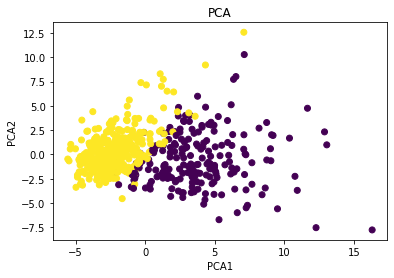

In [62]:
plt.figure()
plt.title('PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c= target)

In [64]:
# tSNE

tsne = TSNE(n_components=2)
tsne.fit(data)
transformed_data = tsne.fit_transform(data)
tf_dataframe = pd.DataFrame(data = transformed_data, columns = ['PC1', 'PC2'])
target_df = pd.DataFrame(data = target, columns = ['target'])

cancer_data = pd.concat([tf_dataframe, target_df], axis=1)
cancer_data

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,PC1,PC2,target
0,31.912569,15.870139,0
1,17.121967,18.018505,0
2,26.359699,17.728054,0
3,26.555677,-1.090963,0
4,21.736244,12.354308,0
...,...,...,...
564,26.914591,21.422010,0
565,20.283625,23.164009,0
566,10.565929,1.250896,0
567,33.211010,17.816496,0


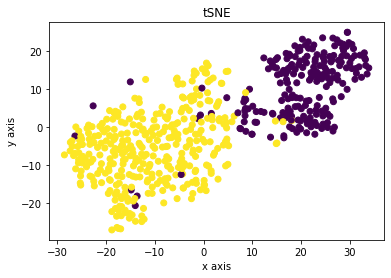

In [65]:
plt.figure()
plt.title('tSNE')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c= target)